### Pre-training - Fine tuning VGG16 for cats_vs_dogs dataset

In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras import optimizers

Using TensorFlow backend.


In [4]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [5]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights)) 

This is the number of trainable weights before freezing the conv base: 30


In [7]:
conv_base.trainable=False

In [8]:
 print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [9]:
#generating batches of images from the directories and converting to integers
train_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\train'
val_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\validation'
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
val_generator = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [12]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10, validation_data=val_generator, 
                              validation_steps=50)

Epoch 1/10
100/100 [==============================] - 2317s 23s/step - loss: 0.5995 - acc: 0.6780 - val_loss: 0.4507 - val_acc: 0.8310
Epoch 2/10
100/100 [==============================] - 2466s 25s/step - loss: 0.4859 - acc: 0.7805 - val_loss: 0.3731 - val_acc: 0.8610
Epoch 3/10
100/100 [==============================] - 2214s 22s/step - loss: 0.4434 - acc: 0.7955 - val_loss: 0.3339 - val_acc: 0.8760
Epoch 4/10
100/100 [==============================] - 2453s 25s/step - loss: 0.4026 - acc: 0.8250 - val_loss: 0.3113 - val_acc: 0.8870
Epoch 5/10
100/100 [==============================] - 2414s 24s/step - loss: 0.3910 - acc: 0.8260 - val_loss: 0.2934 - val_acc: 0.8860
Epoch 6/10
100/100 [==============================] - 2232s 22s/step - loss: 0.3656 - acc: 0.8355 - val_loss: 0.3035 - val_acc: 0.8760
Epoch 7/10
100/100 [==============================] - 2154s 22s/step - loss: 0.3612 - acc: 0.8290 - val_loss: 0.2782 - val_acc: 0.8900
Epoch 8/10
100/100 [==============================] - 2

In [16]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [17]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [18]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10, validation_data=val_generator, 
                              validation_steps=50)

Epoch 1/10
100/100 [==============================] - 2482s 25s/step - loss: 0.3407 - acc: 0.8475 - val_loss: 0.2213 - val_acc: 0.9180
Epoch 2/10
100/100 [==============================] - 2282s 23s/step - loss: 0.2853 - acc: 0.8690 - val_loss: 0.1961 - val_acc: 0.9210
Epoch 3/10
100/100 [==============================] - 2275s 23s/step - loss: 0.2521 - acc: 0.8965 - val_loss: 0.1970 - val_acc: 0.9150
Epoch 4/10
100/100 [==============================] - 2471s 25s/step - loss: 0.2115 - acc: 0.9080 - val_loss: 0.1994 - val_acc: 0.9200
Epoch 5/10
100/100 [==============================] - 2283s 23s/step - loss: 0.2298 - acc: 0.9060 - val_loss: 0.1911 - val_acc: 0.9210
Epoch 6/10
100/100 [==============================] - 2347s 23s/step - loss: 0.1863 - acc: 0.9230 - val_loss: 0.2503 - val_acc: 0.9010
Epoch 7/10
100/100 [==============================] - 2289s 23s/step - loss: 0.1779 - acc: 0.9230 - val_loss: 0.1880 - val_acc: 0.9330
Epoch 8/10
100/100 [==============================] - 2

In [19]:
model.save('6. Fine Tuning VGG16.h5')

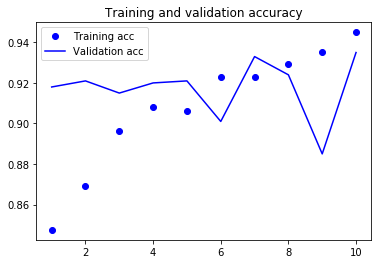

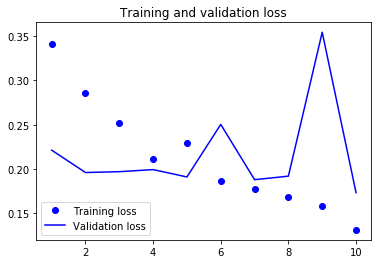

In [21]:
#visualize accuracy and loss during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
#testing the model
test_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\test'
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test accuracy: ', test_acc)

Found 1000 images belonging to 2 classes.
test accuracy:  0.9249999976158142
